## Connect to BigQuery



In [2]:
# import libraries
from google.cloud import bigquery
from google.colab import auth

# authenticate
auth.authenticate_user()

# initialize the client for BigQuery
project_id = 'lookerbigquerychurn'  # replace with your own GCP project ID
client = bigquery.Client(project=project_id, location='US')

## Load table data

In [3]:
# get the dataset and table
dataset_ref = client.dataset('employeechurn', project=project_id) # replace with your own schema
dataset = client.get_dataset(dataset_ref)
table_ref = dataset.table('tbl_hr_data')
table = client.get_table(table_ref)

# print table schema
table.schema




[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [4]:
new_table_ref = dataset.table('tbl_new_employees')
new_table = client.get_table(new_table_ref)
new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

### Convert to dataframes

In [5]:
# convert to dataframe
df = client.list_rows(table=table).to_dataframe()
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.38,0.53,2,157,3,0,1,0,sales,low,EMP00001
1,0.80,0.86,5,262,6,0,1,0,sales,medium,EMP00002
2,0.11,0.88,7,272,4,0,1,0,sales,medium,EMP00003
3,0.72,0.87,5,223,5,0,1,0,sales,low,EMP00004
4,0.37,0.52,2,159,3,0,1,0,sales,low,EMP00005


In [10]:
df['Quit_the_Company'].value_counts()/df.shape[0]

,count
Quit_the_Company,
0,0.761664
1,0.238336


In [6]:
# convert to dataframe
df2 = client.list_rows(table=new_table).to_dataframe()
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.537849,0.122914,2,208,2,0,0,0,IT,high,NE15043
1,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
2,0.555186,0.555949,2,187,3,0,0,0,RandD,medium,NE15035
3,0.605273,0.713086,2,218,3,0,0,0,RandD,high,NE15069
4,0.043437,0.162372,2,175,3,0,0,0,RandD,high,NE15082


## Build Model

In [8]:
!pip install pycaret # 3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 108.9 MB/s eta 0:00:00
   ━━━

In [7]:
from pycaret.classification import *

# setup or model
setup(df,
      target='Quit_the_Company',
      session_id=123,
      ignore_features=['employee_id'],
      categorical_features=['salary','Departments'])

,Description,Value
0,Session id,123
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9881,0.9910,0.9585,0.9913,0.9746,0.9668,0.9671,0.8700
lightgbm,Light Gradient Boosting Machine,0.9853,0.9932,0.9505,0.9876,0.9686,0.9591,0.9594,0.8410
xgboost,Extreme Gradient Boosting,0.9852,0.9921,0.9581,0.9797,0.9687,0.9590,0.9592,0.2730
et,Extra Trees Classifier,0.9840,0.9908,0.9505,0.9820,0.9658,0.9554,0.9557,0.8470
gbc,Gradient Boosting Classifier,0.9765,0.9891,0.9313,0.9689,0.9496,0.9343,0.9347,0.9150
dt,Decision Tree Classifier,0.9747,0.9698,0.9605,0.9354,0.9476,0.9310,0.9312,0.1230
ada,Ada Boost Classifier,0.9584,0.9830,0.9085,0.9167,0.9123,0.8851,0.8853,0.4600
knn,K Neighbors Classifier,0.9343,0.9687,0.9205,0.8246,0.8698,0.8260,0.8284,0.3360
qda,Quadratic Discriminant Analysis,0.8749,0.9154,0.8086,0.7169,0.7566,0.6734,0.6784,0.1070
lr,Logistic Regression,0.7932,0.8178,0.3584,0.6129,0.4516,0.3351,0.3536,1.2660


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

In [11]:
rf_model = create_model('rf')

final_df = predict_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9848,0.9860,0.9442,0.9916,0.9673,0.9574,0.9579
1,0.9819,0.9939,0.9442,0.9793,0.9615,0.9497,0.9499
2,0.9924,0.9959,0.9760,0.9919,0.9839,0.9789,0.9789
3,0.9876,0.9871,0.9600,0.9877,0.9736,0.9655,0.9657
4,0.9848,0.9926,0.9400,0.9958,0.9671,0.9572,0.9578
5,0.9924,0.9932,0.9680,1.0000,0.9837,0.9788,0.9790
6,0.9876,0.9897,0.9640,0.9837,0.9737,0.9656,0.9657
7,0.9924,0.9908,0.9720,0.9959,0.9838,0.9788,0.9789
8,0.9895,0.9891,0.9640,0.9918,0.9777,0.9708,0.9710


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9904,0.9931,0.9674,0.9924,0.9797,0.9735,0.9736


In [12]:
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
1679,0.43,0.55,2,159,3,0,0,RandD,low,1,1,0.97
4665,0.63,0.93,3,236,4,0,0,sales,high,0,0,1.00
1076,0.09,0.79,6,276,4,0,0,sales,medium,1,1,1.00
1253,0.85,1.00,4,234,5,0,0,hr,low,1,1,0.99
2570,0.80,0.96,3,257,5,0,0,support,medium,0,0,0.75


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 1679 to 14934
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     4502 non-null   float32 
 1   last_evaluation        4502 non-null   float32 
 2   number_project         4500 non-null   Int64   
 3   average_montly_hours   4502 non-null   Int64   
 4   time_spend_company     4500 non-null   Int64   
 5   Work_accident          4501 non-null   Int64   
 6   promotion_last_5years  4502 non-null   Int64   
 7   Departments            4502 non-null   category
 8   salary                 4502 non-null   category
 9   Quit_the_Company       4502 non-null   Int64   
 10  prediction_label       4502 non-null   int64   
 11  prediction_score       4502 non-null   float64 
dtypes: Int64(6), category(2), float32(2), float64(1), int64(1)
memory usage: 387.4 KB


## Apply the selected model to predict Churning for new employees

In [15]:
new_predictions = predict_model(rf_model, data=df2)

new_predictions.tail()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9300,0,0.0000,0.0000,0.0000,0.0000,0.0000


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
95,0.205280,0.616096,6,153,3,1,1,sales,low,NE15059,0,0,0.96
96,0.976977,0.860386,6,296,3,0,0,sales,medium,NE15067,0,1,0.54
97,0.691851,0.389109,6,207,2,1,0,technical,low,NE15007,0,0,1.00
98,0.827268,0.779616,7,224,2,0,0,sales,low,NE15034,0,0,0.63
99,0.432677,0.450902,7,276,2,0,0,sales,high,NE15096,0,0,0.68


## Save the predictions for new employees to BigQuery

In [16]:
# write back to bigquery
new_predictions.to_gbq(
  'employeechurn.pilot_predictions',
  project_id, chunksize=None, if_exists='replace'
  ) # replace `employeedata` with your own schema

100%|██████████| 1/1 [00:00<00:00, 6853.44it/s]


## Relative feature importance for the model

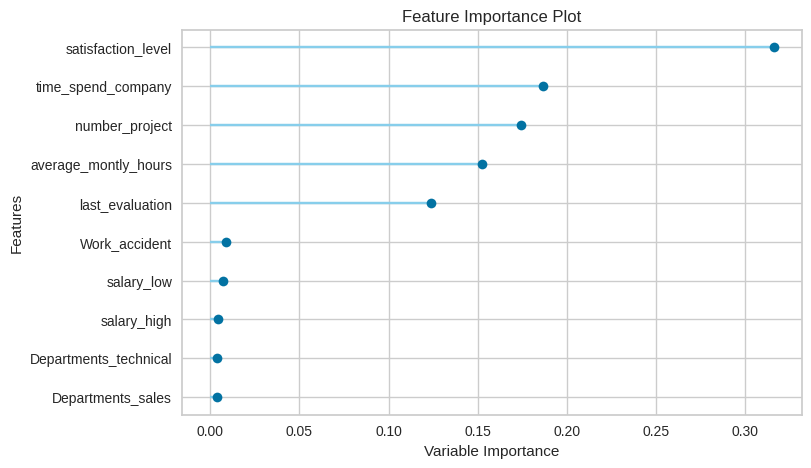

In [17]:
plot_model(rf_model, plot='feature')

In [18]:
# create a feature table
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_management',
       'Departments_product_mng', 'Departments_sales', 'Departments_IT',
       'Departments_technical', 'Departments_RandD',
       'Departments_support', 'Departments_hr', 'Departments_marketing',
       'Departments_accounting', 'salary_medium', 'salary_low',
       'salary_high'], dtype=object)

In [19]:
rf_model.feature_importances_

array([0.31590926, 0.12397999, 0.17444144, 0.15228352, 0.18648895,
       0.00879937, 0.00166611, 0.00162452, 0.00118108, 0.00371594,
       0.00168   , 0.00380856, 0.00161397, 0.00297005, 0.00182668,
       0.00127811, 0.00163246, 0.00362204, 0.00697355, 0.0045044 ])

In [20]:
import pandas as pd

feature_table = pd.DataFrame(
  zip(rf_model.feature_names_in_, rf_model.feature_importances_),
  columns = ['feature', 'importance']
  )

feature_table

,feature,importance
0,satisfaction_level,0.315909
1,last_evaluation,0.123980
2,number_project,0.174441
3,average_montly_hours,0.152284
4,time_spend_company,0.186489
5,Work_accident,0.008799
6,promotion_last_5years,0.001666
7,Departments_management,0.001625
8,Departments_product_mng,0.001181
9,Departments_sales,0.003716


In [21]:
feature_table.to_gbq(
  'employeechurn.feature_table',
  project_id,
  chunksize=None,
  if_exists='replace'
  ) # replace `employeechurn` with your own schema

100%|██████████| 1/1 [00:00<00:00, 5349.88it/s]
